In [3]:
import pandas as pd
df_train = pd.read_hdf('../data/processed/train/train_case1.hdf')
df_valid = pd.read_hdf('../data/processed/validation/valid_case1.hdf')
df_train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,day,month,year,weekday,...,to_new_year_days,is_feb_special_time,feb_special_gaussian,from_feb_special_days,to_feb_special_days,is_nov_special_time,nov_special_gaussian,from_nov_special_days,to_nov_special_days,is_holiday
0,2013-01-02,0,59,22154,999.00,1.0,2,1,2013,2,...,363,False,0.0,314,51,False,0.0,88,277,False
1,2013-01-03,0,25,2552,899.00,1.0,3,1,2013,3,...,362,False,0.0,315,50,False,0.0,89,276,False
2,2013-01-05,0,25,2552,899.00,-1.0,5,1,2013,5,...,360,False,0.0,317,48,False,0.0,91,274,False
3,2013-01-06,0,25,2554,1709.05,1.0,6,1,2013,6,...,359,False,0.0,318,47,False,0.0,92,273,False
4,2013-01-15,0,25,2555,1099.00,1.0,15,1,2013,1,...,350,False,0.0,327,38,False,0.0,101,264,False


###  Aggregates:

Periods:
  * last month
  * last but one month
  * last 3 months
  * last 6 months
  * last 15 days
  
Sets:
  * Item
  * Shop
  * Item x Shop
  * Cluster Shops and items
  * Item Category
 
Features:
  * Average (per day) number of items sold 
  * variance of items sold
  * average number of items sold on weekend day

### Additional Features

Month based:
  * Number of fridays in a month
  * Number of sundays in a month

/home/piotrek/.local/lib/python3.5/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


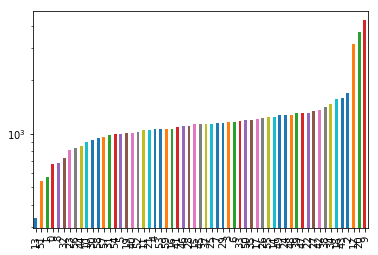

In [22]:
import matplotlib.pyplot as plt
df_aggr = df_train[['shop_id', 'item_price', 'item_cnt_day']]
df_aggr['val'] = df_aggr['item_price'] * df_aggr['item_cnt_day']
df_aggr_sorted = df_aggr.groupby('shop_id')['val'].mean().sort_values()
df_aggr_sorted.index = map(str, df_aggr_sorted.index)
df_aggr_sorted.plot(kind='bar', logy=True)
plt.show()

/home/piotrek/.local/lib/python3.5/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


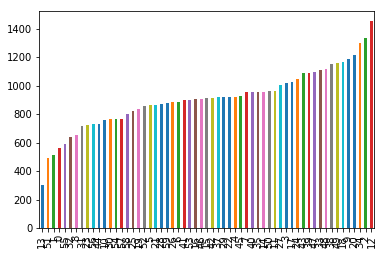

In [28]:
import matplotlib.pyplot as plt
df_aggr = df_train[['shop_id', 'item_price', 'item_cnt_day']]
df_aggr['val'] = df_aggr['item_price'] * df_aggr['item_cnt_day']
df_aggr_sorted = df_aggr.groupby('shop_id')['item_price'].mean().sort_values()
df_aggr_sorted.index = map(str, df_aggr_sorted.index)
df_aggr_sorted.plot(kind='bar')
plt.show()

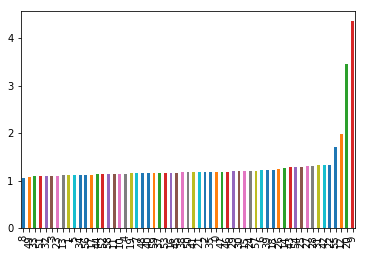

In [29]:
# Sklepy prawie nie różnią się ilością sprzedanych itemów dziennie 

df_aggr_sorted = df_aggr.groupby('shop_id')['item_cnt_day'].mean().sort_values()
df_aggr_sorted.index = map(str, df_aggr_sorted.index)
df_aggr_sorted.plot(kind='bar')
plt.show()

/home/piotrek/.local/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


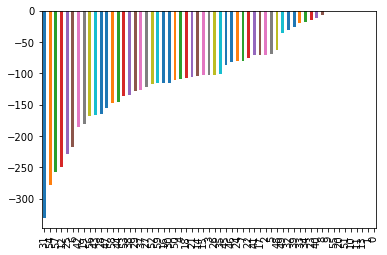

In [30]:
df_aggr['returns'] = (df_aggr['item_cnt_day'] < 0) * df_aggr['item_cnt_day']
df_aggr_sorted = (df_aggr.groupby('shop_id')['returns'].sum() / df_aggr.groupby('shop_id')['item_cnt_day'].mean()).sort_values()
df_aggr_sorted.index = map(str, df_aggr_sorted.index)
df_aggr_sorted.plot(kind='bar')
plt.show()

In [25]:
(df_aggr['item_cnt_day'] < 0)

0          False
1          False
2           True
3          False
4          False
5          False
6          False
7          False
8          False
9          False
10         False
11         False
12         False
13         False
14         False
15         False
16         False
17         False
18         False
19         False
20         False
21         False
22         False
23         False
24         False
25         False
26         False
27         False
28         False
29         False
           ...  
2831717    False
2831718    False
2831719    False
2831720    False
2831721    False
2831722    False
2831723    False
2831724    False
2831725    False
2831726    False
2831727    False
2831728    False
2831729    False
2831730    False
2831731    False
2831732    False
2831733    False
2831734    False
2831735    False
2831736    False
2831737    False
2831738    False
2831739    False
2831740    False
2831741    False
2831742    False
2831743    False
2831744    Fal

In [18]:
df_aggr_sorted

13     336.971116
51     543.139580
1      570.307679
0      673.366136
8      688.557444
32     726.415503
23     807.341835
56     830.528410
44     854.496465
10     895.044294
30     918.255238
58     949.925603
57     956.818571
31     983.366024
54     989.264518
5      989.679812
19    1004.439490
40    1008.594515
52    1025.071053
11    1045.401082
21    1051.316030
4     1060.126215
53    1061.326582
59    1062.954309
16    1067.133378
41    1084.334402
46    1102.832544
28    1109.129044
15    1129.556712
45    1129.996929
37    1132.705336
25    1136.050506
7     1139.995143
29    1148.809253
3     1161.927658
6     1166.949108
33    1183.429793
50    1185.427585
35    1188.848578
17    1210.673129
26    1222.823061
55    1240.054008
14    1244.738005
49    1273.752348
24    1276.898781
48    1277.858301
39    1305.623044
47    1306.457646
22    1311.348293
27    1334.729503
42    1354.209528
38    1414.169408
34    1456.924515
18    1557.114429
43    1583.873007
2     1679